In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import model 
from keras.preprocessing.image import ImageDataGenerator
# from keras.preprocessing.image import img_to_array
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

from glob import glob
import cv2

In [3]:
from tensorflow.keras.preprocessing.image import img_to_array,load_img

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import os
for dirname, _, filenames in os.walk('c:/Users/jadha/Data/MTP_data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

c:/Users/jadha/Data/MTP_data/Test\Catla\001 (1).jpg
c:/Users/jadha/Data/MTP_data/Test\Catla\001 (10).jpg
c:/Users/jadha/Data/MTP_data/Test\Catla\001 (11).jpg
c:/Users/jadha/Data/MTP_data/Test\Catla\001 (12).jpg
c:/Users/jadha/Data/MTP_data/Test\Catla\001 (13).jpg
c:/Users/jadha/Data/MTP_data/Test\Catla\001 (14).jpg
c:/Users/jadha/Data/MTP_data/Test\Catla\001 (15).jpg
c:/Users/jadha/Data/MTP_data/Test\Catla\001 (16).jpg
c:/Users/jadha/Data/MTP_data/Test\Catla\001 (17).jpg
c:/Users/jadha/Data/MTP_data/Test\Catla\001 (18).jpg
c:/Users/jadha/Data/MTP_data/Test\Catla\001 (19).jpg
c:/Users/jadha/Data/MTP_data/Test\Catla\001 (2).jpg
c:/Users/jadha/Data/MTP_data/Test\Catla\001 (20).jpg
c:/Users/jadha/Data/MTP_data/Test\Catla\001 (3).jpg
c:/Users/jadha/Data/MTP_data/Test\Catla\001 (4).jpg
c:/Users/jadha/Data/MTP_data/Test\Catla\001 (5).jpg
c:/Users/jadha/Data/MTP_data/Test\Catla\001 (6).jpg
c:/Users/jadha/Data/MTP_data/Test\Catla\001 (7).jpg
c:/Users/jadha/Data/MTP_data/Test\Catla\001 (8).jpg
c

In [6]:
train_dir = 'c:/Users/jadha/Data/MTP_data/Train/'

In [7]:
fish = []
fish_image = []
for i in os.listdir(train_dir):
    for image_filename in os.listdir(train_dir + i):
        fish.append(i) # name of the fish
        fish_image.append(i + '/' + image_filename) # image of the fish

In [8]:
train_fish= pd.DataFrame(fish, columns=["fish"])
train_fish["fish_image"] = fish_image

In [9]:
train_fish

fish           fish_image
0    Catla  Catla/001 (100).JPG
1    Catla  Catla/001 (101).JPG
2    Catla  Catla/001 (102).JPG
3    Catla  Catla/001 (103).JPG
4    Catla  Catla/001 (104).JPG
..     ...                  ...
965   Tuna    Tuna/009 (78).jpg
966   Tuna    Tuna/009 (79).jpg
967   Tuna     Tuna/009 (8).jpg
968   Tuna    Tuna/009 (80).jpg
969   Tuna     Tuna/009 (9).jpg

[970 rows x 2 columns]

In [10]:
train_fish.shape

(970, 2)

In [11]:
train_fish['fish'].value_counts()

Pomfret        179
Catla          172
Rohu           161
Tilapia        126
Mrigal         112
Silver Carp     84
Tuna            70
Comman carp     40
Grass Carp      26
Name: fish, dtype: int64

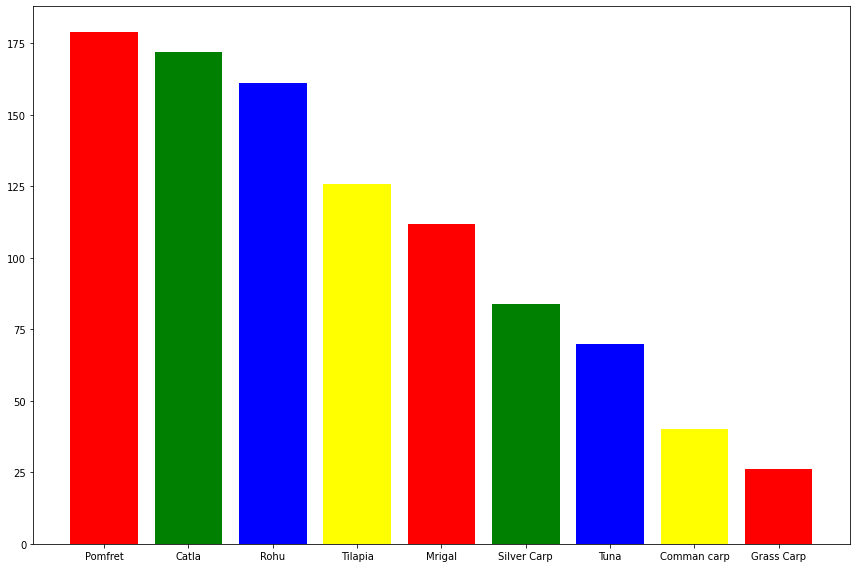

In [12]:
plt.figure(figsize=(12,8))
plt.bar(x=train_fish['fish'].value_counts().keys(),
        height=train_fish['fish'].value_counts().values,
        color=['red','green','blue','yellow'])
plt.tight_layout();

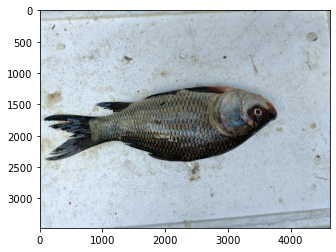

In [13]:
img=plt.imread(train_dir+'Catla/001 (25).JPG')
plt.imshow(img);

In [14]:
img.shape

(3468, 4624, 3)

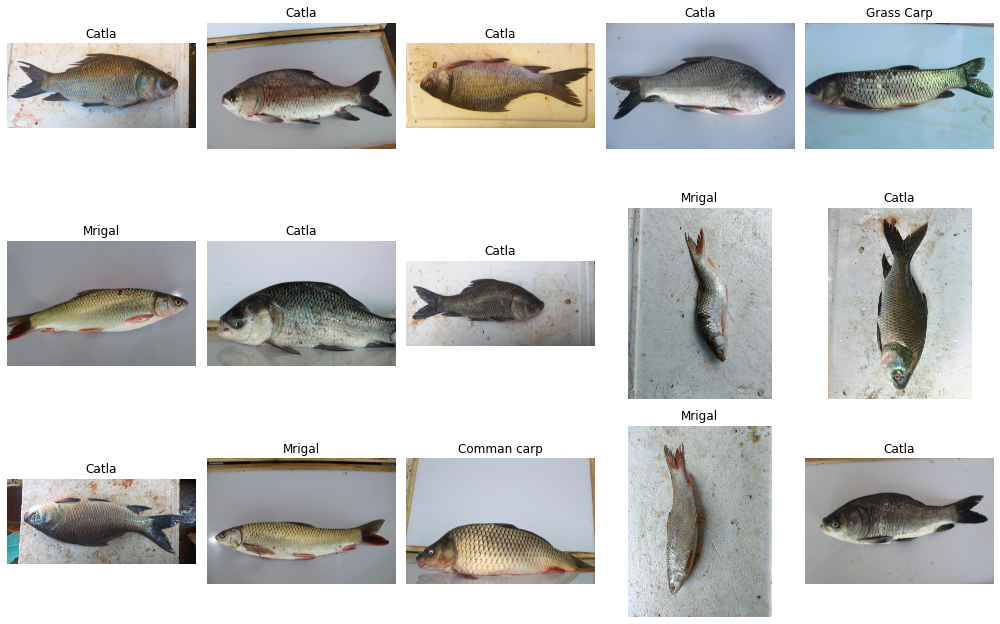

In [15]:
plt.figure(figsize=[14,9])
for i in range (1,16):
    plt.subplot(3,5,i)
    k=np.random.randint(0,330)
    img=plt.imread(train_dir+train_fish["fish_image"][k])
    plt.imshow(img)
    plt.title(train_fish["fish"][k])
    plt.axis('off')
plt.tight_layout()

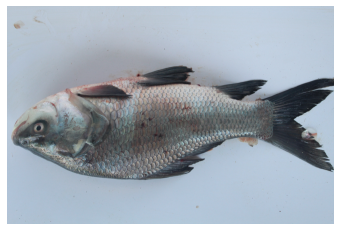

In [16]:
img = load_img(train_dir + "Catla/001 (100).JPG")
plt.imshow(img)
plt.axis("off")
plt.show()

In [17]:
array_image = img_to_array(img)
print("Image Shape --> ", array_image.shape)

Image Shape -->  (3456, 5184, 3)


In [18]:
fishCountUnique = glob(train_dir + '/*' )
numberOfClass = len(fishCountUnique)
print("How many different fish are there  -->  ",numberOfClass)

How many different fish are there  -->   9


# EDA

In [19]:
root_path = 'c:/Users/jadha/Data/MTP_data/Train/'

# Class names
class_names = sorted(os.listdir(root_path))
n_classes = len(class_names)

# Print
print(f"Total Number of Classes : {n_classes}")

Total Number of Classes : 9


In [20]:
class_dis = [len(os.listdir(root_path + name)) for name in class_names]
total_imgs = sum(class_dis)

# Print
print(f"Total Number of Images : {total_imgs}")

Total Number of Images : 970


In [21]:
import plotly.express as px
fig = px.pie(
    names=class_names,
    values=class_dis,
    title='Class Distribution',
    hole=0.4
)
fig.show()

In [23]:
fig = px.bar(
    y=class_names,
    x=class_dis,
    title='Class Distribution'
)
fig.show()